## Aufgabe 4
## Import von Bibliotheken

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

## Einlesen der Dateien

In [111]:
df_players = pd.read_csv('data/players.csv', memory_map=True)
df_match_50000 = pd.read_csv('data/match.csv' ,memory_map=True, nrows=50000)
df_match_500 = pd.read_csv('data/match.csv' ,memory_map=True, nrows=500)
df_hero_names = pd.read_csv('data/hero_names.csv', memory_map=True  )
# df_chat = pd.read_csv('data/dota-2-matches/chat.csv', memory_map=True)

## Auswahl der benötigten Daten

In [112]:
full_list_match = list(df_match_50000.columns)
full_list_players = list(df_players.columns)
wanted = ['match_id','duration','radiant_win']
# df_match_50000.drop(full_list-wanted)
col_players = df_players[['match_id',
 'account_id',
 'hero_id',
 'player_slot',
 'gold',
 'gold_spent',
 'gold_per_min',
 'xp_per_min',
 'kills',
 'deaths',
 'assists',
 'denies',
 'last_hits',
 'stuns',
 'hero_damage',
 'hero_healing',
 'tower_damage']]

In [113]:
col_players.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833


## Überprüfen auf fehlenden Werte

In [114]:

print ("Na Werte \t" +  str(df_match_50000.isnull().sum()))


Na Werte 	match_id                   0
start_time                 0
duration                   0
tower_status_radiant       0
tower_status_dire          0
barracks_status_dire       0
barracks_status_radiant    0
first_blood_time           0
game_mode                  0
radiant_win                0
negative_votes             0
positive_votes             0
cluster                    0
dtype: int64


In [115]:
print ("Na Werte \t" +  str(df_players.isnull().sum()))
print("\n\nDie NA Werte sind nicht zu bereinigen, mit ihnen muss umgegangen werden.")

Na Werte 	match_id                                  0
account_id                                0
hero_id                                   0
player_slot                               0
gold                                      0
gold_spent                                0
gold_per_min                              0
xp_per_min                                0
kills                                     0
deaths                                    0
assists                                   0
denies                                    0
last_hits                                 0
stuns                                     0
hero_damage                               0
hero_healing                              0
tower_damage                              0
item_0                                    0
item_1                                    0
item_2                                    0
item_3                                    0
item_4                                    0
item_5                

In [116]:
print ("Na Werte \t" +  str(df_hero_names.isnull().sum()))

Na Werte 	name              0
hero_id           0
localized_name    0
dtype: int64


## Überprüfung auf Ausreiser

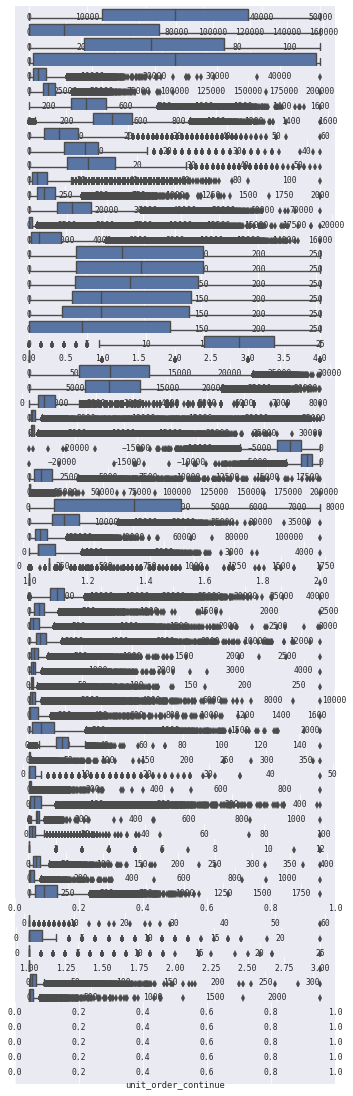

In [117]:
# alle Spalten von df_players
cols = df_players.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 15))

for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=df_players, ax=axes[i])

fig.tight_layout()

plt.show()

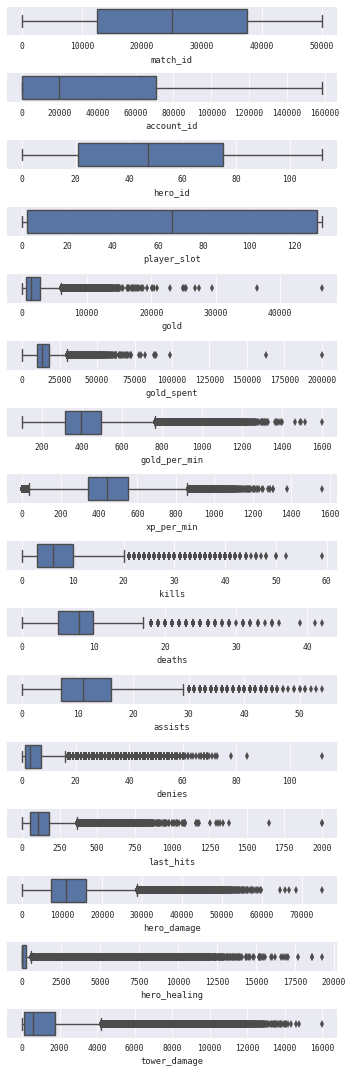

In [118]:
# einzelne Spalten von df_players bzw alle spalten von col_players in boxplot anzeigen
cols = col_players.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 15))

for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=col_players, ax=axes[i])

fig.tight_layout()

plt.show()

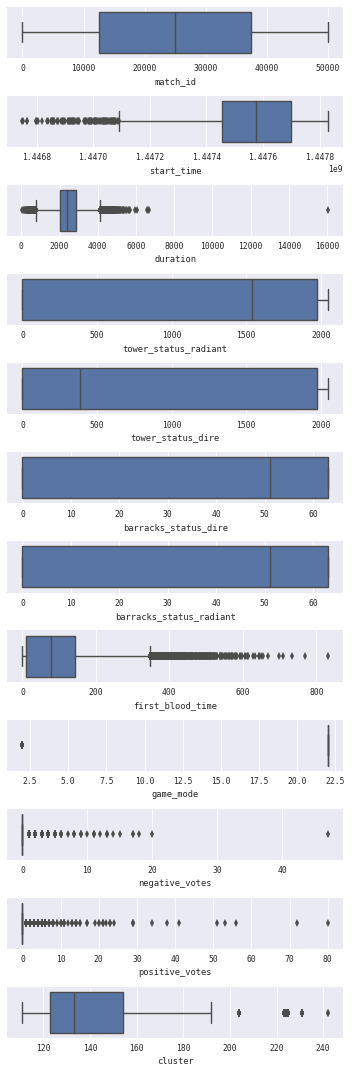

In [119]:
# Ausreiser mit Hilfe von Boxplots in df_match_50000 visualisieren
cols = df_match_50000.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(5, 15))

for i in range(len(cols)):
    sns.boxplot(x=cols[i], orient='h', data=df_match_50000, ax=axes[i])

fig.tight_layout()

plt.show()

## Gibt es Helden die erfolgreicher sind als andere?

In [120]:
# Datentypen der Spalten von df_match_50000
# hier kann man erkennen, dass die Spalte radiant_win einen boolischen Wert hat
df_match_50000.dtypes

match_id                   int64
start_time                 int64
duration                   int64
tower_status_radiant       int64
tower_status_dire          int64
barracks_status_dire       int64
barracks_status_radiant    int64
first_blood_time           int64
game_mode                  int64
radiant_win                 bool
negative_votes             int64
positive_votes             int64
cluster                    int64
dtype: object

In [121]:
# Anzahl Zeilen und Spalten von df_match_50000
df_match_50000.shape

(50000, 13)

In [122]:
# Anzahl Zeilen und Spalten von df_players
df_players.shape

(500000, 73)

In [123]:
# Aus boolischen Werten Spalte "radiant_win" in int umwandeln
df_match_50000["radiant_win"] = df_match_50000.radiant_win.astype(int)

In [124]:
df_match_50000["radiant_win"].head()

0    1
1    0
2    0
3    0
4    1
Name: radiant_win, dtype: int32

In [125]:
# beide Datensätze verbinduen mit Hilfe von match_id und Betrahtung nur von Teammitglieder mit player_slot 0-4
mat = df_match_50000.merge(df_match_50000,on='match_id').merge(df_players[df_players["player_slot"]<6],on='match_id')
mat.head()

,match_id,start_time_x,duration_x,tower_status_radiant_x,tower_status_dire_x,barracks_status_dire_x,barracks_status_radiant_x,first_blood_time_x,game_mode_x,radiant_win_x,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,1446750112,2375,1982,4,3,63,1,22,1,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1446750112,2375,1982,4,3,63,1,22,1,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1446750112,2375,1982,4,3,63,1,22,1,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1446750112,2375,1982,4,3,63,1,22,1,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1446750112,2375,1982,4,3,63,1,22,1,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# warum mat mehr Spalten hat als beide verbundene Datensätze
mat.shape

(250000, 97)

In [127]:
# mat.groupby('hero_id').mean()['radiant_win_x']
df_gb_heroID = pd.DataFrame(mat.groupby('hero_id').mean()['radiant_win_x'], index=np.arange(113))
df_gb_heroID.columns =["winrate"]
df_gb_heroID["hero_id"] = np.arange(1,114)
df_gb_heroID

,winrate,hero_id
0,0.136364,1
1,0.484149,2
2,0.454823,3
3,0.487500,4
4,0.469646,5
5,0.562169,6
6,0.518660,7
7,0.521411,8
8,0.524041,9
9,0.539709,10


In [128]:
#df_hero_names.head(113)
df_hero_names = df_hero_names.merge(df_gb_heroID, left_on='hero_id', right_on='hero_id', how='outer')
df_hero_names.head(113)

,name,hero_id,localized_name,winrate
0,npc_dota_hero_antimage,1,Anti-Mage,0.136364
1,npc_dota_hero_axe,2,Axe,0.484149
2,npc_dota_hero_bane,3,Bane,0.454823
3,npc_dota_hero_bloodseeker,4,Bloodseeker,0.487500
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,0.469646
5,npc_dota_hero_drow_ranger,6,Drow Ranger,0.562169
6,npc_dota_hero_earthshaker,7,Earthshaker,0.518660
7,npc_dota_hero_juggernaut,8,Juggernaut,0.521411
8,npc_dota_hero_mirana,9,Mirana,0.524041
9,npc_dota_hero_morphling,10,Morphling,0.539709


In [129]:
df_hero_names.sort_values("winrate")

,name,hero_id,localized_name,winrate
0,npc_dota_hero_antimage,1,Anti-Mage,0.136364
52,npc_dota_hero_life_stealer,54,Lifestealer,0.411295
78,npc_dota_hero_lone_druid,80,Lone Druid,0.411848
60,npc_dota_hero_bounty_hunter,62,Bounty Hunter,0.414465
79,npc_dota_hero_chaos_knight,81,Chaos Knight,0.416162
57,npc_dota_hero_huskar,59,Huskar,0.426716
17,npc_dota_hero_sven,18,Sven,0.428571
13,npc_dota_hero_pudge,14,Pudge,0.435838
10,npc_dota_hero_nevermore,11,Shadow Fiend,0.446667
24,npc_dota_hero_lion,26,Lion,0.451009


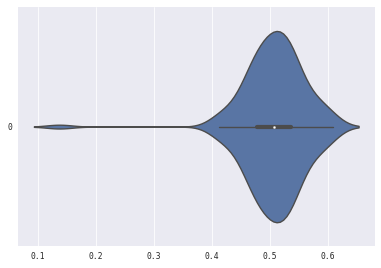

In [130]:
sns.violinplot(data=df_hero_names.winrate, orient="h");

# sns.barplot(orient="h",data=df_hero_names.sort("winrate"),x="localized_name", y="winrate")

## Prüfen ob gewisse Helden öfter gespielt werden als andere



In [131]:
df_hero_names = mat.hero_id.value_counts().to_frame(name="total_plays").merge(df_hero_names,left_index=True, right_index=True)


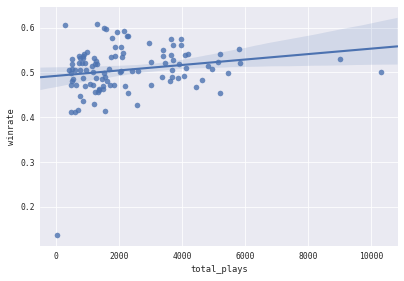

In [132]:

sns.regplot(data=df_hero_names, y="winrate", x="total_plays")

In [133]:
# Entfernen des Ausreisers
df_hero_names.drop(df_hero_names.winrate<0.14, inplace=True)


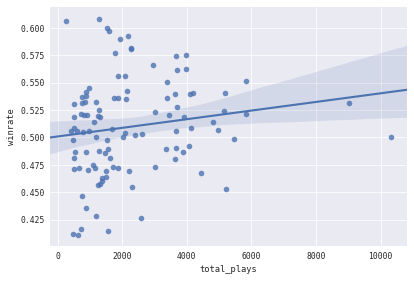

In [134]:
 sns.regplot(data=df_hero_names, y="winrate", x="total_plays")


In [135]:
df_hero_names.corr()

,total_plays,hero_id,winrate
total_plays,1.000000,-0.246683,0.157869
hero_id,-0.246683,1.000000,-0.013915
winrate,0.157869,-0.013915,1.000000


## Ist die Winrate der Champions abhängig von der Spieldauer?

In [136]:
mat.shape

(250000, 97)

In [139]:
# df_mph nach 'duration_x' aufsteigend sortiert
df_mat_sort = mat.sort_values(by='duration_x')
df_mat_sort.head()

,match_id,start_time_x,duration_x,tower_status_radiant_x,tower_status_dire_x,barracks_status_dire_x,barracks_status_radiant_x,first_blood_time_x,game_mode_x,radiant_win_x,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
157194,31438,1447625450,59,2047,2047,63,63,0,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157190,31438,1447625450,59,2047,2047,63,63,0,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157191,31438,1447625450,59,2047,2047,63,63,0,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157192,31438,1447625450,59,2047,2047,63,63,0,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157193,31438,1447625450,59,2047,2047,63,63,0,22,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df_mat_sort.shape

(250000, 97)

In [140]:
# sortierte df nach Dauer nur mit Spalte Dauer beschreiben, um Klassengrößen festzulegen 
df_mat_sort["duration_x"].describe()

count    250000.000000
mean       2476.453500
std         634.626184
min          59.000000
25%        2029.000000
50%        2415.000000
75%        2872.000000
max       16037.000000
Name: duration_x, dtype: float64

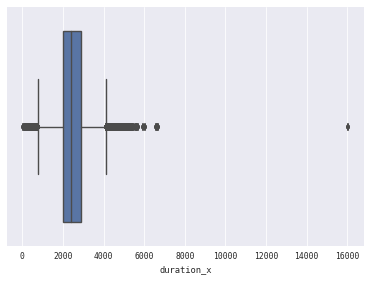

In [141]:
# Spalte duration_x in einem Boxplot visualisieren
sns.boxplot(df_mat_sort["duration_x"]);

In [142]:
# DataFram mit 5 Klassen für die Dauer erstellen
df_mat_klassen = pd.DataFrame({'klassen': pd.cut(df_mat_sort['duration_x'], bins=[0,1000,2000,4000,8000,17000])})

In [143]:
df_mat_klassen.head()

,klassen
157194,"(0, 1000]"
157190,"(0, 1000]"
157191,"(0, 1000]"
157192,"(0, 1000]"
157193,"(0, 1000]"


In [144]:
df_mat_klassen.shape

(250000, 1)

In [145]:
table = df_mat_klassen['klassen'].value_counts()
table

(2000, 4000]     187950
(1000, 2000]      56885
(4000, 8000]       4295
(0, 1000]           865
(8000, 17000]         5
Name: klassen, dtype: int64

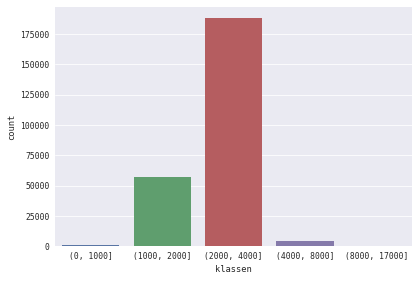

In [147]:
# Häufigkeitsverteilung der Klassen
sns.countplot(x='klassen', data=df_mat_klassen);

In [149]:
# df_mat_klassen mit df_mat_sort mergen
df_mat_new = df_mat_klassen.merge(df_mat_sort, left_on='klassen', right_on='match_id', how='outer')

In [150]:
df_mat_new.shape

(500000, 98)

In [152]:
df_mat_new.head()

,klassen,match_id,start_time_x,duration_x,tower_status_radiant_x,tower_status_dire_x,barracks_status_dire_x,barracks_status_radiant_x,first_blood_time_x,game_mode_x,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,"(0, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(0, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(0, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(0, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(0, 1000]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
mat_end.corr()['winrate22'].sort_values()

NameError: name 'mat_end' is not defined

In [119]:
model = sm.ols(data=mat_new, formula='winrate_x~duration_x').fit()
print(model.summary())
# Bestimmtheitsmaß bzw. Determinationskoeffizient (R-squared) liegt bei 0,000 und enstspricht 
# im Fall eines linearen Regressionsmodells dem Quadrat des multiplen Korrelationskoeffizienten bzw. 0.011009**2 = 0,0001212

NameError: name 'mat_new' is not defined

In [120]:
sns.regplot(data=mat_new, x='duration_x', y='winrate_x');

NameError: name 'mat_new' is not defined

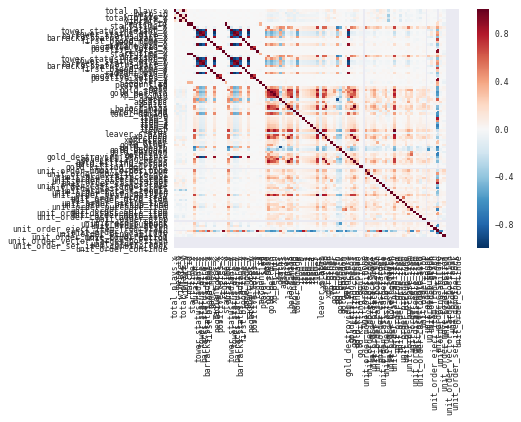

In [277]:
sns.heatmap(mat_new.corr());

In [ ]:
mat.drop(mat['duration_x']>7000)
mat.columns
# mat.duration_y.plot.box()
# mat.drop(mat.duration_y >7000, inplace=True)
# sns.boxplot(data=mat.duration_y)
# mat[mat.duration_y >7000]